# Medical Imaging
### 18 Apr 2022
### Lab 3

Consider the SPECT imaging of the 2D phantom stored in derenzo.mat, containing a number of hot spots of different sizes, with $ FOV = 256 \times 256~mm^2 $. For the exercise assume a parallel beam geometry with a rotation increment of 0.25º and a maximum number of photon counts of 1500. Please note that, given that a 2D phantom is considered, only 1 of the 2 dimensions of the gamma camera is used in this simulation.

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

#### 1. Load the phantom, get its dimensions, and display it.

In [2]:
img = loadmat("derenzo.mat")
images = np.array(img["derenzo"])
[rows, cols] = images.shape
print(rows, cols)

256 256


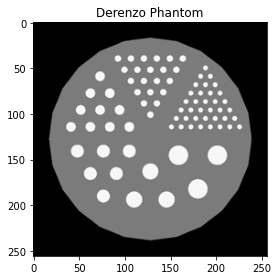

In [3]:
%matplotlib inline
plt.figure("Derenzo Phantom")
plt.title("Derenzo Phantom")
plt.imshow(images, cmap="gray")
plt.tight_layout()

#### 2. Simulate the sinogram and reconstructed SPECT image of the phantom by filtered back-projection, first without and then with noise (using the random.poisson function of the numpy library as in the previous lab). Make sure to constrain the reconstructed image to have the same size as the phantom.

In [4]:
from skimage.transform import radon
from skimage.transform import iradon

In [5]:
theta = np.arange(0.,180.,0.25)
sinogram = radon(images, theta=theta)


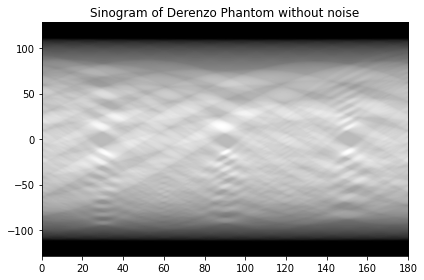

In [6]:
plt.figure("Sinogram of Derenzo Phantom without noise")
plt.title("Sinogram of Derenzo Phantom without noise")
plt.imshow(sinogram, cmap="gray", aspect="auto", extent=(0, 180, -sinogram.shape[0]/2, sinogram.shape[0]/2))
plt.tight_layout()


In [7]:
filtered_backprojection = iradon(sinogram, theta=theta, filter_name="ramp")

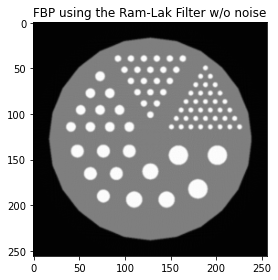

In [8]:
# Filtered back projection without noise
plt.figure("Filtered Backprojection without noise using the Ram-Lak Filter")
plt.title("FBP using the Ram-Lak Filter w/o noise")
plt.imshow(filtered_backprojection, cmap="gray")
    
plt.tight_layout()

_Sinogram after noise is added_

In [9]:
theta = np.arange(0., 180., 0.25)
sinogram = radon(images, theta=theta)

sinogram_norm = (sinogram / max(sinogram.flatten())) * 255   # Converting to 255 scale 
sinogram_norm = sinogram_norm.astype("uint8")                # Converting to "uint8" data type 
sinogram_noise = np.random.poisson(sinogram_norm)            # Sampling from Poisson distribution

# Converting to 1500 photons
sinogram_noise_1500 = (sinogram_noise / max(sinogram_noise.flatten())) * 1500

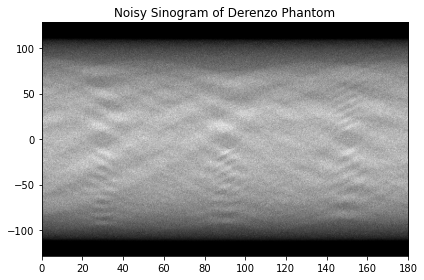

In [10]:
plt.figure("Noisy Sinogram of Derenzo Phantom")
plt.title("Noisy Sinogram of Derenzo Phantom")
plt.imshow(sinogram_noise_1500, cmap="gray", aspect="auto", extent=(0, 180, -sinogram.shape[0]/2, sinogram.shape[0]/2))
plt.tight_layout()

_Filtered back projection after adding noise_


In [11]:
filtered_backprojection_rl = iradon(sinogram_noise_1500, theta=theta, filter_name="ramp")


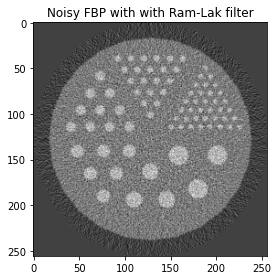

In [12]:
plt.figure("Filtered Backprojection after adding noise")
plt.title("Noisy FBP with with Ram-Lak filter")
plt.imshow(filtered_backprojection_rl, cmap="gray")

plt.tight_layout()

#### 3. Define appropriate ROIs for the big, the medium and one of the small hotspots (using roipoly in Matlab/Python).

In [13]:
from roipoly import RoiPoly

In [14]:
%matplotlib qt
plt.figure("Small")
plt.imshow(filtered_backprojection, cmap="gray")
smallRoi = RoiPoly(color="r")

plt.figure("Medium")
plt.imshow(filtered_backprojection, cmap="gray")
medRoi = RoiPoly(color="b")

plt.figure("Large")
plt.imshow(filtered_backprojection, cmap="gray")
largeRoi = RoiPoly(color="g")

plt.imshow(filtered_backprojection, cmap="gray")
smallRoi.display_roi()
smallRoi.display_mean(filtered_backprojection)

medRoi.display_roi()
medRoi.display_mean(filtered_backprojection)

largeRoi.display_roi()
largeRoi.display_mean(filtered_backprojection)

#### 4. Illustrate and quantify the partial volume effects (PVE’s) suffered by each hot spot by: <br>
    a. plotting intensity profiles through the different hot spots; and 
    b. comparing their average intensities in the phantom (ground truth) and in the reconstructed image.
    c. showing the effects of changing the spatial resolution and/or the SNR.
    
Note: Make sure to normalize both the phantom and the reconstructed image (to 1) so that the intensities are comparable between images.

In [15]:
from skimage.measure import profile_line
from scipy.ndimage import gaussian_filter

In [16]:
smallMask = smallRoi.get_mask(filtered_backprojection_rl)
medMask = medRoi.get_mask(filtered_backprojection_rl)
largeMask = largeRoi.get_mask(filtered_backprojection_rl)

In [17]:
images_norm = images / max(images.flatten())
filtered_backprojection_norm = filtered_backprojection / max(filtered_backprojection.flatten())
filtered_backprojection_rl_norm = filtered_backprojection_rl / max(filtered_backprojection_rl.flatten())

In [18]:
print("Small Hotspots")
phantomSmallAvg = str(images_norm[smallMask].mean())[:5]
reconstructSmallAvg = str(filtered_backprojection_norm[smallMask].mean())[:5]
reconstructSmallNoiseAvg = str(filtered_backprojection_rl_norm[smallMask].mean())[:5]
print("Average Intensity of Phantom with Small hotspots", phantomSmallAvg)
print("Average Intensity of Reconstruction with Small hotspots", reconstructSmallAvg)
print("Average Intensity of Noisy Reconstruction with Small hotspots", reconstructSmallNoiseAvg)

print()
print("Medium Hotspots")
phantomMedAvg = str(images_norm[medMask].mean())[:5]
reconstructMedAvg = str(filtered_backprojection_norm[medMask].mean())[:5]
reconstructMedNoiseAvg = str(filtered_backprojection_rl_norm[medMask].mean())[:5]
print("Average Intensity of Phantom with Medium hotspots", phantomMedAvg)
print("Average Intensity of Reconstruction with Medium hotspots", reconstructMedAvg)
print("Average Intensity of Noisy Reconstruction with Medium hotspots", reconstructMedNoiseAvg)

print()
print("Large Hotspots")
phantomLargeAvg = str(images_norm[largeMask].mean())[:5]
reconstructLargeAvg = str(filtered_backprojection_norm[largeMask].mean())[:5]
reconstructLargeNoiseAvg = str(filtered_backprojection_rl_norm[largeMask].mean())[:5]
print("Average Intensity of Phantom with Large hotspots", phantomLargeAvg)
print("Average Intensity of Reconstruction with Large hotspots", reconstructLargeAvg)
print("Average Intensity of Noisy Reconstruction with Large hotspots", reconstructLargeNoiseAvg)


Small Hotspots
Average Intensity of Phantom with Small hotspots 0.623
Average Intensity of Reconstruction with Small hotspots 0.635
Average Intensity of Noisy Reconstruction with Small hotspots 0.379

Medium Hotspots
Average Intensity of Phantom with Medium hotspots 0.694
Average Intensity of Reconstruction with Medium hotspots 0.707
Average Intensity of Noisy Reconstruction with Medium hotspots 0.431

Large Hotspots
Average Intensity of Phantom with Large hotspots 0.786
Average Intensity of Reconstruction with Large hotspots 0.801
Average Intensity of Noisy Reconstruction with Large hotspots 0.493


In [19]:
%matplotlib qt
array = [images_norm, filtered_backprojection_norm, filtered_backprojection_rl_norm]
end = (0, 70)
start = (250, 215)

for num, norm in enumerate(array[::-1]):
    plt.figure("Effect of Spatial Resolution - " + str(num))
    if num == 2:
        plt.suptitle("Original Phantom")
    elif num == 1:
        plt.suptitle("Filtered Backprojection without noise")
    elif num == 0:
        plt.suptitle("Filtered Backprojection with noise")
        
        
    plt.subplot(2, 4, 1)
    plt.title("Original")
    plt.imshow(norm, cmap="gray")
    plt.plot([start[1], end[1]], [start[0], end[0]], 'r')
    
    profile = profile_line(norm, start, end)
    plt.subplot(2, 4, 5)
    plt.plot(profile)
    
    plt.subplot(2, 4, 2)
    images_gauss = gaussian_filter(norm, sigma=2.0)
    profile = profile_line(images_gauss, start, end)
    plt.title("Sigma = 2.0")
    plt.imshow(images_gauss, cmap="gray")
    plt.plot([start[1], end[1]], [start[0], end[0]], 'r')
    plt.subplot(2, 4, 6)
    plt.plot(profile)

    plt.subplot(2, 4, 3)
    plt.title("Sigma = 2.75")
    images_gauss = gaussian_filter(norm, sigma=2.75)
    profile = profile_line(images_gauss, start, end)
    plt.imshow(images_gauss, cmap="gray")
    plt.plot([start[1], end[1]], [start[0], end[0]], 'r')
    plt.subplot(2, 4, 7)
    plt.plot(profile)


    plt.subplot(2, 4, 4)
    plt.title("Sigma = 3.5")
    images_gauss = gaussian_filter(norm, sigma=3.5)
    profile = profile_line(images_gauss, start, end)
    plt.imshow(images_gauss, cmap="gray")
    plt.plot([start[1], end[1]], [start[0], end[0]], 'r')
    plt.subplot(2, 4, 8)
    plt.plot(profile)
